# Outlines

1. Introduction to tensors (https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html)
2. Autograd in Pytorch
3. An example of performing **gradient descent** in Pytorch


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

## 1.Introduction to Tensors

Tensors are a specialized data structure that are very similar to arrays and matrices.
In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and
NumPy arrays can often share the same underlying memory, eliminating the need to copy data. Tensors
are also optimized for automatic differentiation. If you’re familiar with ndarrays, you’ll be right at home with the Tensor API.


In [2]:
import torch
import numpy as np

### Initializing a Tensor

Tensors can be initialized in various ways. Take a look at the following examples:

#### Directly from data

Tensors can be created directly from data. The data type is automatically inferred.


In [3]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

#### From a NumPy array

Tensors can be created from NumPy arrays (and vice versa - see `bridge-to-np-label`).


In [4]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

#### From another tensor

The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.


In [5]:
x_ones = torch.ones_like(x_data)  # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float)  # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.0559, 0.0780],
        [0.7664, 0.9373]]) 



#### With random or constant values

`shape` is a tuple of tensor dimensions. In the functions below, it determines the dimensionality of the output tensor.


In [6]:
shape = (
    2,
    3,
)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.2398, 0.7220, 0.0140],
        [0.8461, 0.5745, 0.5952]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


---


### Attributes of a Tensor

Tensor attributes describe their shape, datatype, and the device on which they are stored.


In [7]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


---


### Standard numpy-like indexing and slicing


In [8]:
tensor = torch.ones(4, 4)
print("First row: ", tensor[0])
print("First column: ", tensor[:, 0])
print("Last column:", tensor[..., -1])
tensor[:, 1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


**Joining tensors** You can use `torch.cat` to concatenate a sequence of tensors along a given dimension.


In [9]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


### Arithmetic operations


In [10]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = tensor @ tensor.T  # equivalent to tensor.matmul(tensor.T)
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)

# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

**Single-element tensors** If you have a one-element tensor, for example by aggregating all
values of a tensor into one value, you can convert it to a Python
numerical value using `item()`:


In [11]:
agg = tensor.sum()
agg_item = agg.item()  # item() is used to extract a scalar from a tensor
print(agg_item, type(agg_item))

12.0 <class 'float'>


**In-place operations**
Operations that store the result into the operand are called in-place. They are denoted by a `_` suffix.
For example: `x.copy_(y)`, `x.t_()`, will change `x`.


In [12]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)
new_tensor = tensor.add(10)
print(tensor)
print(new_tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])
tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])
tensor([[16., 15., 16., 16.],
        [16., 15., 16., 16.],
        [16., 15., 16., 16.],
        [16., 15., 16., 16.]])


<div class="alert alert-info"><h4>Note</h4><p>In-place operations save some memory, but can be problematic when computing derivatives because of an immediate loss
     of history. Hence, their use is discouraged.</p></div>


---


### Bridge with NumPy

Tensors on the CPU and NumPy arrays can share their underlying memory
locations, and changing one will change the other.


#### Tensor to NumPy array


In [13]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


A change in the tensor reflects in the NumPy array.


In [14]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


#### NumPy array to Tensor


In [15]:
n = np.ones(5)
print(n)
t = torch.from_numpy(n)
print(t)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


#### Changes in the NumPy array reflects in the tensor


In [16]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


## 2.Automatic Differentiation with `torch.autograd`.

To compute those gradients, PyTorch has a built-in differentiation engine
called `torch.autograd`. It supports automatic computation of gradient for any
computational graph.


In [17]:
x = torch.tensor(5.0)
print(x)
print(x.requires_grad)

tensor(5.)
False


In [18]:
x = torch.tensor(5.0, requires_grad=True)  # The default requires_grad is False
print(x.requires_grad)

True


In [19]:
y = (x - 2) ** 2

In [20]:
y

tensor(9., grad_fn=<PowBackward0>)

In [21]:
y.backward()  # compute the derivative

In [22]:
x.grad  # dy/dx = 2*(x-2)

tensor(6.)

In [23]:
x_1 = torch.tensor(5.0, requires_grad=True)
x_2 = torch.tensor(6.0, requires_grad=True)

In [24]:
y = (x_1 - 2) ** 2 + (x_2 - 8) ** 2

In [25]:
y.backward()  # compute the derivative

In [26]:
x_1.grad

tensor(6.)

In [27]:
x_2.grad

tensor(-4.)

## 3.How to do gradient descent?


Let's consider a simple example. Solve the following minimization problem,

$\underset{x_1, x_2}{\text{minimize}} \;(x_1 - 2)^2 + (x_2 - 8)^2$


In [28]:
def obj_fun(x_1, x_2):
    # objective function
    return (x_1 - 2) ** 2 + (x_2 - 8) ** 2

In [29]:
x_1 = torch.tensor(0.0, requires_grad=True)  # initial value
x_2 = torch.tensor(0.0, requires_grad=True)  # initial value
step = 0.01

In [30]:
loss = []
for _ in range(1000):
    # forword calculation
    y = obj_fun(x_1, x_2)
    print(x_1.item(), x_2.item(), y.item())
    loss.append(y.item())

    # backpropagate
    y.backward()
    x_1.data -= step * x_1.grad
    x_2.data -= step * x_2.grad

    # set gradient to zero. Why? Because the backward() function accumulates the gradient in .grad attribute
    x_1.grad.zero_()  # x_1.grad = 0
    x_2.grad.zero_()  # x_2.grad = 0

0.0 0.0 68.0
0.03999999910593033 0.1599999964237213 65.30720520019531
0.07919999957084656 0.31679999828338623 62.721031188964844
0.11761599779129028 0.47046399116516113 60.23728561401367
0.15526367723941803 0.6210547089576721 57.85188674926758
0.19215840101242065 0.7686336040496826 55.56094741821289
0.22831523418426514 0.9132609367370605 53.36073684692383
0.2637489438056946 1.0549957752227783 51.24765396118164
0.29847395420074463 1.1938958168029785 49.21824645996094
0.3325044810771942 1.3300179243087769 47.26919937133789
0.3658543825149536 1.4634175300598145 45.397342681884766
0.398537278175354 1.594149112701416 43.599609375
0.4305665194988251 1.7222660779953003 41.87306213378906
0.461955189704895 1.84782075881958 40.21488952636719
0.49271607398986816 1.9708642959594727 38.62238311767578
0.5228617787361145 2.091447114944458 37.09293746948242
0.552404522895813 2.209618091583252 35.624053955078125
0.581356406211853 2.325425624847412 34.21334457397461
0.6097292900085449 2.4389171600341797

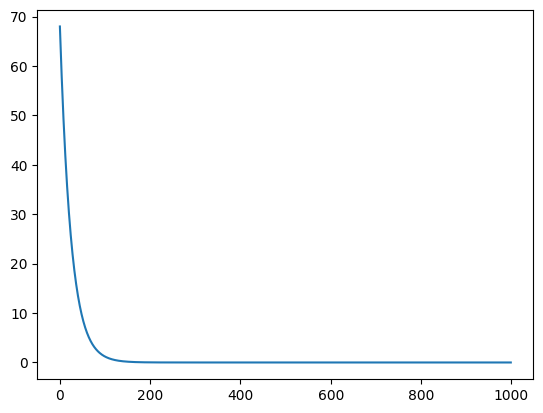

In [31]:
plt.plot(loss)

## In a vectorized form


In [32]:
def obj_fun(x):
    a = torch.tensor([[2.0], [8.0]])
    y = torch.sum((x - a) ** 2)
    return y

In [33]:
x = torch.tensor([[0.0], [0.0]], requires_grad=True)
step = 0.01

In [34]:
loss = []
for _ in range(1000):
    # forword calculation
    y = obj_fun(x)
    print(y.item())
    loss.append(y.item())

    # backpropagate
    y.backward()
    x.data -= step * x.grad

    # set gradient to zero
    x.grad.zero_()

68.0
65.30720520019531
62.721031188964844
60.23728561401367
57.85188674926758
55.56094741821289
53.36073684692383
51.24765396118164
49.21824645996094
47.26919937133789
45.397342681884766
43.599609375
41.87306213378906
40.21488952636719
38.62238311767578
37.09293746948242
35.624053955078125
34.21334457397461
32.85849380493164
31.557302474975586
30.307632446289062
29.10744857788086
27.95479393005371
26.8477840423584
25.784610748291016
24.76354217529297
23.782907485961914
22.841100692749023
21.936595916748047
21.067907333374023
20.23362159729004
19.432369232177734
18.6628475189209
17.923797607421875
17.21401596069336
16.5323429107666
15.877662658691406
15.248908996582031
14.645051956176758
14.065106391906738
13.508129119873047
12.9732084274292
12.45946979522705
11.96607494354248
11.492219924926758
11.037128448486328
10.60006046295166
10.180296897888184
9.7771577835083
9.389981269836426
9.018136978149414
8.661019325256348
8.31804370880127
7.988649845123291
7.672299385070801
7.3684763908386

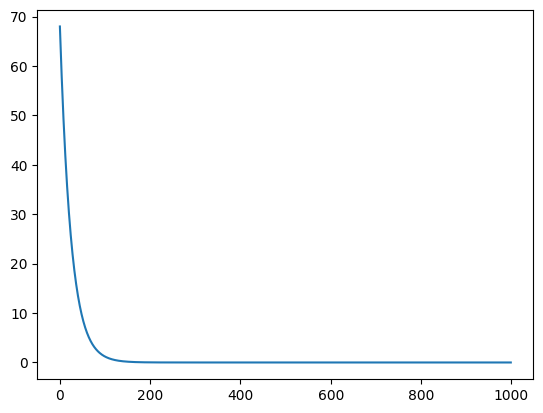

In [35]:
plt.plot(loss)

## More advanced.

In practice, you can use the Pytorch provided package for optimization, torch.optim.

https://pytorch.org/docs/stable/optim.html


In [36]:
import torch.optim as optim

In [37]:
def obj_fun(x):
    a = torch.tensor([[2.0], [8.0]])
    y = torch.sum((x - a) ** 2)
    return y


x = torch.tensor([[0.0], [0.0]], requires_grad=True)
step = 0.01

In [38]:
conv2 = torch.nn.Conv2d(1, 1, 3, stride=1, padding=1)
optimizer1 = optim.SGD(conv2.parameters(), lr=0.01, momentum=0.9)

In [39]:
optimizer = optim.SGD([x], lr=step)

In [40]:
loss = []
for _ in range(1000):
    optimizer.zero_grad()
    y = obj_fun(x)
    print(y.item())
    loss.append(y.item())
    y.backward()
    optimizer.step()

68.0
65.30720520019531
62.721031188964844
60.23728561401367
57.85188674926758
55.56094741821289
53.36073684692383
51.24765396118164
49.21824645996094
47.26919937133789
45.397342681884766
43.599609375
41.87306213378906
40.21488952636719
38.62238311767578
37.09293746948242
35.624053955078125
34.21334457397461
32.85849380493164
31.557302474975586
30.307632446289062
29.10744857788086
27.95479393005371
26.8477840423584
25.784610748291016
24.76354217529297
23.782907485961914
22.841100692749023
21.936595916748047
21.067907333374023
20.23362159729004
19.432369232177734
18.6628475189209
17.923797607421875
17.21401596069336
16.5323429107666
15.877662658691406
15.248908996582031
14.645051956176758
14.065106391906738
13.508129119873047
12.9732084274292
12.45946979522705
11.96607494354248
11.492219924926758
11.037128448486328
10.60006046295166
10.180296897888184
9.7771577835083
9.389981269836426
9.018136978149414
8.661019325256348
8.31804370880127
7.988649845123291
7.672299385070801
7.3684763908386

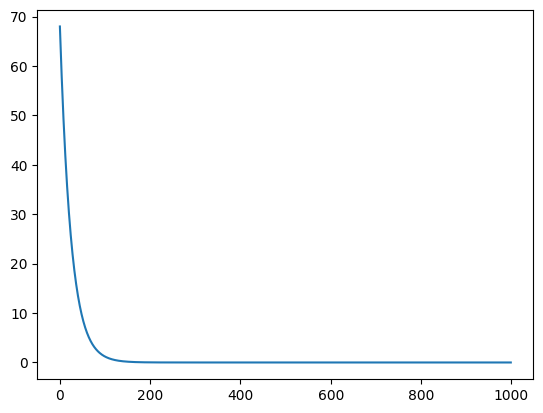

In [41]:
plt.plot(loss)